# Capstone Project - Home Credit Default Risk

### Completed by - Kushal Ram Tayi (u1448179)

## Table Of Contents

##### 1.Introduction
##### 2.Importing Necessary Libraries
##### 3.Loading The Train Dataset
##### 4.DataCleaning and PreProcessing
##### 5.Correlation Matrix
##### 6.Visualizations
##### 7.Loading the Test Dataset
##### 8.DataCleaning and PreProcessing of Test Dataset
##### 9.Transactional Data
##### 10.Result

### 1. Introduction

Home Credit Group aims to enhance financial inclusion for individuals with limited or nonexistent credit histories. The challenge at hand is to leverage alternative data sources, such as telco and transactional information, more effectively to predict clients' repayment capabilities.Currently, Home Credit employs statistical and machine learning methods for these predictions,but they seek to maximize the utility of their data.

Predictive analysis involves using historical data to make predictions about future events oroutcomes. In the context of Home Credit's problem, predictive analysis can be used to forecastwhether a customer will be able to repay a loan or not. This is a fundamental aspect of credit risk assessment.

Classification algorithms are a type of predictive modeling technique used for categorizing data
into different classes or groups. In this case, classification algorithms can be applied to classify
loan applicants into categories such as "likely to repay" and "unlikely to repay.”
The primary objective is to ensure that clients with the capacity to repay are not declined, and
loans are structured with optimal principal amounts, maturities, and repayment schedules to
empower clients towards financial success.

The data analytics team is going to execute this project. The project will get ready for review by
operations by November 20th.For further developments, we will be using comments to revise
deliverables as necessary. The deadline for those revisions will be November 28th.

### 2.Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
#Compress/hide the warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 3.Loading the Train Dataset

In [3]:
train_data = pd.read_csv('application_train.csv')


The pd.read_csv() function reads the data from a CSV file named 'application_train.csv' and stores it in a Pandas DataFrame called train_data. 

In [4]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


head () function displays the first few rows (by default, the first 5 rows) of the train_data DataFrame. 
It provides a quick preview of the data to understand its structure and contents.

In [5]:
train_data.shape

(307511, 122)

It retrieves and prints the shape of the train_data DataFrame, which represents the number of rows and columns in the dataset.

### 4.Data Cleaning and pre-processing

In [6]:
# Getting the Information About Missing Values
missing_values = train_data.isnull().sum()
train_missing_percent = (missing_values / len(train_data)) * 100
missing_info = pd.DataFrame({'Train_Missing_values': missing_values, 'Train_Missing_Values(%)': train_missing_percent})

print(missing_info.sort_values(by=['Train_Missing_Values(%)']))

                             Train_Missing_values  Train_Missing_Values(%)
SK_ID_CURR                                      0                 0.000000
HOUR_APPR_PROCESS_START                         0                 0.000000
REG_REGION_NOT_WORK_REGION                      0                 0.000000
LIVE_REGION_NOT_WORK_REGION                     0                 0.000000
REG_CITY_NOT_LIVE_CITY                          0                 0.000000
...                                           ...                      ...
NONLIVINGAPARTMENTS_MEDI                   213514                69.432963
NONLIVINGAPARTMENTS_MODE                   213514                69.432963
COMMONAREA_MODE                            214865                69.872297
COMMONAREA_AVG                             214865                69.872297
COMMONAREA_MEDI                            214865                69.872297

[122 rows x 2 columns]


We checked for missing values in the train_data DataFrame, counting how many are missing in each column.

We calculated the percentage of missing values for each column in train_data.

Finally, we sorted the columns by their missing value percentages to identify those with the highest missing values, which helps us prioritize them for data cleaning or filling in missing data.

In [7]:
# Dropping the columns with missing values greater than 50

columns_to_drop = missing_info[missing_info['Train_Missing_Values(%)'] > 50].index

# Drop the columns from the 'train_data' DataFrame
train_data1 = train_data.drop(columns=columns_to_drop)


Creating a new Pandas Series called columns_to_drop by retrieving the column names from the missing_info DataFrame where the 'Train_Missing_Values(%)' column has values greater than 50%. 

Then we are creating a new DataFrame called train_data1 by dropping the columns identified in the columns_to_drop Series from the original train_data DataFrame. It effectively removes columns with a high percentage of missing values from the dataset.

It helps in data preprocessing by eliminating columns with a significant amount of missing data. Removing such columns can improve the quality of the dataset and simplify subsequent analysis or modeling tasks.

In [8]:
train_data1.shape

(307511, 81)

Dropping the columns with missing values greater than 50% from the train_data dataset has resulted in a reduction in the number of columns from 122 to 81. In other words, by removing columns with a significant amount of missing data, you have effectively reduced the dimensionality or complexity of the dataset.

This data compression, achieved by removing columns with excessive missing data, can streamline the data preparation process and potentially lead to more effective and efficient analysis and modeling.


In [9]:


# Filter the columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index

# Separate categorical and numeric columns
categorical_columns = train_data1.select_dtypes(include=['object']).columns
numeric_columns = train_data1.select_dtypes(include=['number']).columns

# Calculate mean values for each column with missing values (in numeric columns)
mean_values_numeric = train_data1[columns_with_missing_values & numeric_columns].mean()

# Calculate mean values for each column with missing values (in categorical columns)
mean_values_categorical = train_data1[columns_with_missing_values & categorical_columns].mode().iloc[0]

# Now, 'mean_values_numeric' contains mean values for numeric columns with missing values,
# and 'mean_values_categorical' contains mode values for categorical columns with missing values


First The data was split into categorical and numeric columns to impute missing values in the train_data1 DataFrame.

For numeric columns,we decided to use the average value (mean) as a replacement for any missing values.

For categorical columns,we choose the most frequently occurring value (mode) as a replacement for any missing values. 


In [10]:
# Fill missing values with mean for numeric columns
train_data1[numeric_columns] = train_data1[numeric_columns].fillna(train_data1[numeric_columns].mean())

# Fill missing values with mode for categorical columns
for column in categorical_columns:
    mode_value = train_data1[column].mode().iloc[0]
    train_data1[column] = train_data1[column].fillna(mode_value)

Here we are filling in missing values in both numeric and categorical columns of the train_data1 DataFrame. Numeric columns are imputed with the mean, and categorical columns are imputed with the mode. 

Imputing missing values is an essential step in data preprocessing to ensure that the dataset is ready for analysis or modeling.

In [11]:
train_data1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.000000,0.000,0.000000,1.000000,0.000000,1.000000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


The dataset called train_data1 has been thoroughly cleaned and transformed to a state where it's now well-prepared and suitable for both the data exploration process (EDA) and the modeling process.

In [71]:
# Removing Outliers
def removeOutliers(col):
    Q3 = np.quantile(col, 0.75)
    Q1 = np.quantile(col, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range,upper_range
lowlevel,uplevel=removeOutliers(train_data1['CNT_CHILDREN'])
train_data1['CNT_CHILDREN']=np.where(train_data1['CNT_CHILDREN']>uplevel,uplevel,train_data1['CNT_CHILDREN'])
train_data1['CNT_CHILDREN']=np.where(train_data1['CNT_CHILDREN']<lowlevel,lowlevel,train_data1['CNT_CHILDREN'])

Outliers are data points that significantly differ from the majority of the data. In this case, there appears to be an outlier with a value of 19 in the 'CNT_CHILDREN' variable. This value is much higher or lower than most other values in the dataset.

The IQR is a statistical measure that helps identify outliers in a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of the data. The IQR is used to define a range within which data points are considered "normal," and values outside this range are considered potential outliers.


In [72]:
train_data1['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.407455
std           0.683742
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.500000
Name: CNT_CHILDREN, dtype: float64

The statement suggests that by using the IQR method, the outlier with a value of 19 in the 'CNT_CHILDREN' variable is addressed or decreased to a value of 2.5. Thus the outlier has been modified to bring it within a more reasonable range.

### 5.Correlation Matrix

In [43]:
# Calculate the correlation matrix
correlation_matrix = train_data1.corr()

# Get the correlation of the target variable with other predictors
target_correlation = correlation_matrix['TARGET'].sort_values(ascending=False)

# Print the correlation values
print("Correlation of TARGET with predictors:\n", target_correlation)


Correlation of TARGET with predictors:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
REGION_POPULATION_RELATIVE    -0.037227
AMT_GOODS_PRICE               -0.039628
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_3                  -0.157397
EXT_SOURCE_2                  -0.160303
Name: TARGET, Length: 68, dtype: float64


The 'TARGET' variable has a positive correlation of approximately 0.0782 with 'DAYS_BIRTH.' This suggests that as a borrower's age (measured in days) increases, there is a slight positive correlation with the likelihood of loan default. In other words, younger borrowers tend to have a slightly higher chance of defaulting on their loans.

The 'TARGET' variable  have negative correlations with 'EXT_SOURCE_3' and 'EXT_SOURCE_2' approximately -0.1574 and -0.1603, respectively. These variables are external credit scores, and a lower external credit score is associated with a higher likelihood of loan default.

### 6.VISUALIZATIONS

In [12]:
target_distribution = train_data1['TARGET'].value_counts()
print("Target Distribution:\n", target_distribution)

Target Distribution:
 0    282686
1     24825
Name: TARGET, dtype: int64


Calculated the distribution of the 'TARGET' variable in the train_data1 DataFrame.It shows that repayment was done by most of the people,i.e,282686.

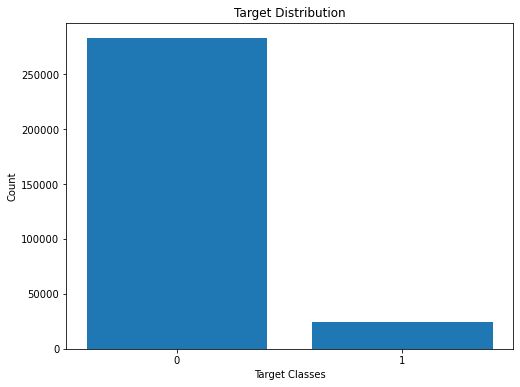

In [13]:
# Plotting the Distribution of Target variable

plt.figure(figsize=(8, 6))
plt.bar(target_distribution.index, target_distribution.values)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.xticks(target_distribution.index)
plt.show()


Based on the description and above plot, most people returned the money. Very clearly the target label is imbalanced.

#### Who is the highest borrower? Male or Female

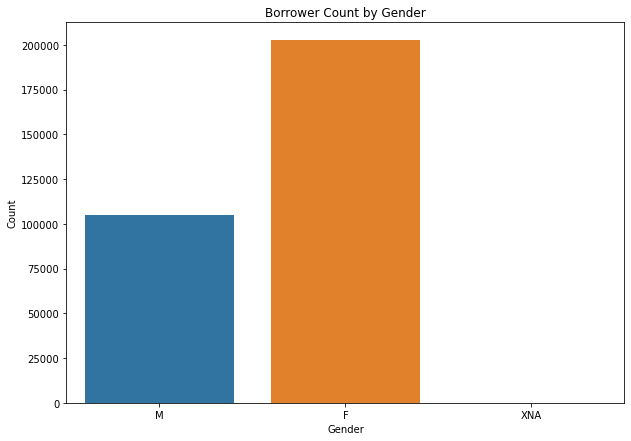

In [14]:

plt.figure(figsize=(10, 7))

# Create the countplot
sns.countplot(x='CODE_GENDER', data=train_data1)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Borrower Count by Gender')

# Show the plot
plt.show()

In [15]:
print("Females are the highest borrowers with counts:\n{}".format(train_data1.CODE_GENDER.value_counts()))

Females are the highest borrowers with counts:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


#### Finding the major borrowers and  their occupations?

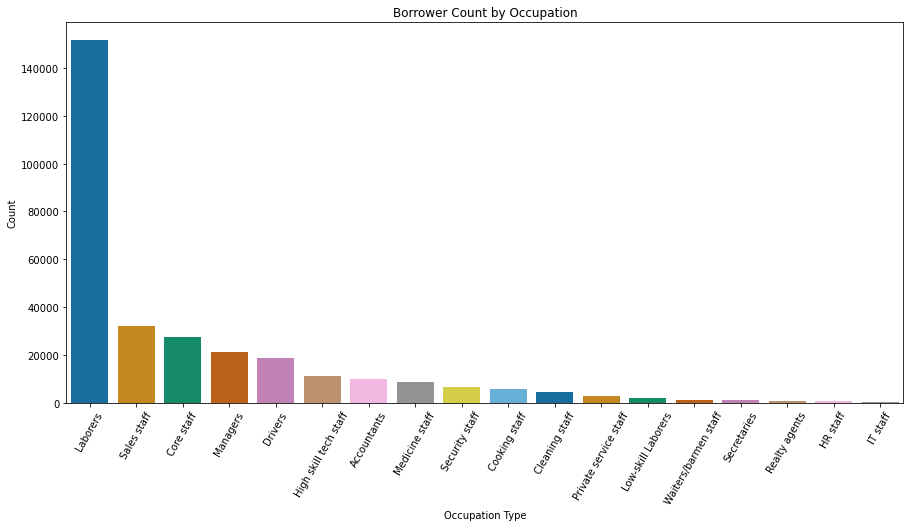

In [16]:
occupation_counts = train_data1['OCCUPATION_TYPE'].value_counts().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(15, 7))

# Create the countplot with Seaborn and set the custom color palette
sns.countplot(x='OCCUPATION_TYPE', data=train_data1, palette='colorblind', order=occupation_counts.index)
plt.xlabel("Occupation Type")

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Add labels and title
plt.ylabel("Count")
plt.title("Borrower Count by Occupation")

# Show the plot
plt.show()


 Most of the clients are laborers and the least of the clients are IT Staff.

#### How economically stable are clients? Who are the most and least stable?


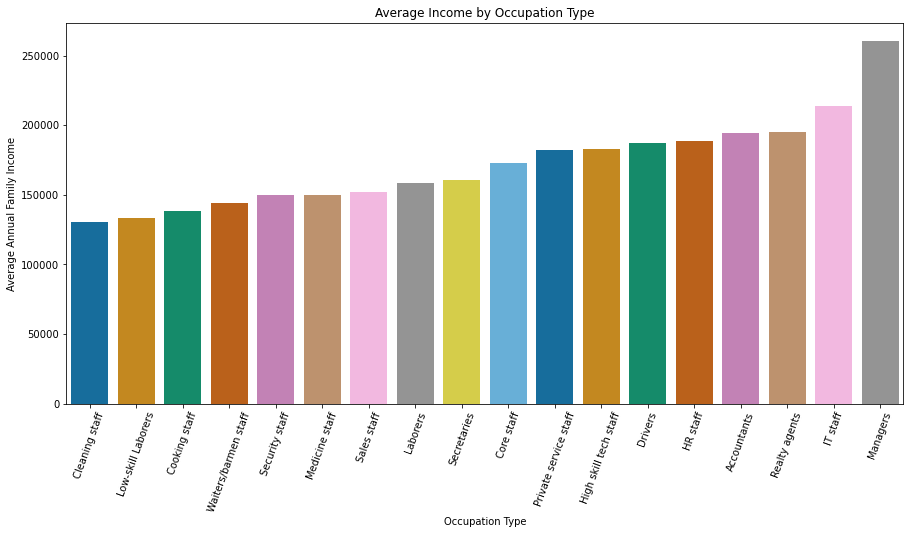

In [17]:
average_income_by_occupation = train_data1.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a bar plot with Seaborn and set the custom color palette ("viridis")
sns.barplot(x=average_income_by_occupation.index, y=average_income_by_occupation.values, palette="colorblind")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual Family Income")
plt.title("Average Income by Occupation Type")

# Show the plot
plt.show()

Managers are the most earning borrowers while cleaning staff are the least earning borrowers - Based on the annual family income

#### Which category of occupants repay on time and are better clients for company to lend money?

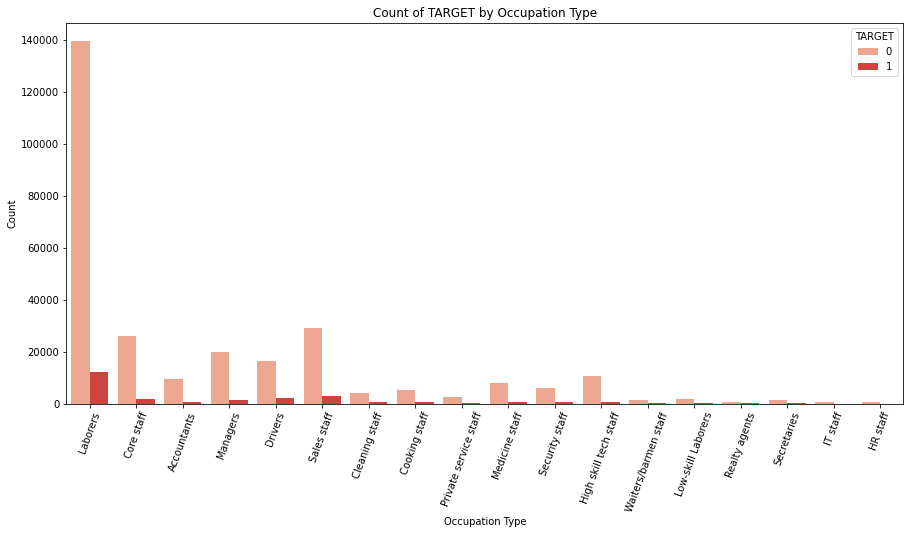

In [18]:

plt.figure(figsize=(15, 7))

# Create a countplot with hue
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=train_data1, palette="Reds")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Count of TARGET by Occupation Type")

# Show the plot
plt.show()

The labourers have the highest difficulty in repaying. 

Also it seems lending to Reality agents, IT staff, HR staff is the safest.

#### Does clients having own_car repay on time and are better clients for company to lend money?

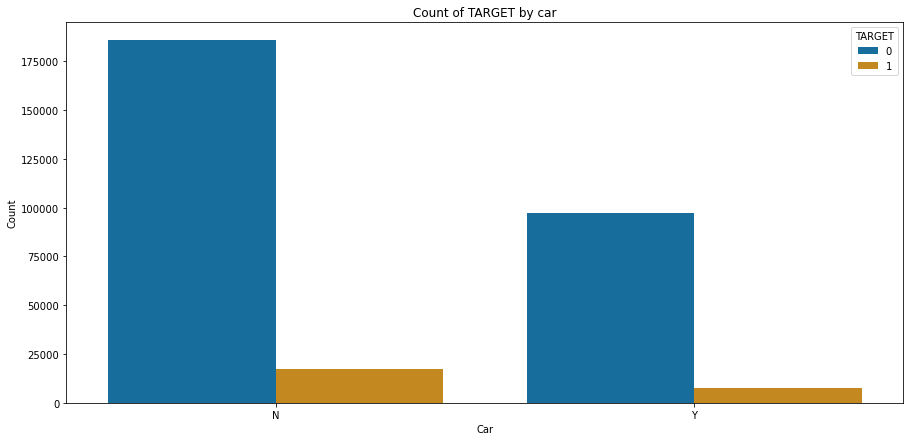

In [19]:

plt.figure(figsize=(15, 7))

# Create a countplot with hue
sns.countplot(x='FLAG_OWN_CAR', hue='TARGET', data=train_data1, palette="colorblind")
plt.xlabel("Car")
plt.ylabel("Count")
plt.title("Count of TARGET by car")

# Show the plot
plt.show()

For both car owners and non-car owners, the majority of applicants are in the '0' category, indicating that they have repaid their loans on time (non-defaulters).

It appears that a slightly higher proportion of non-car owners are non-defaulters compared to car owners.

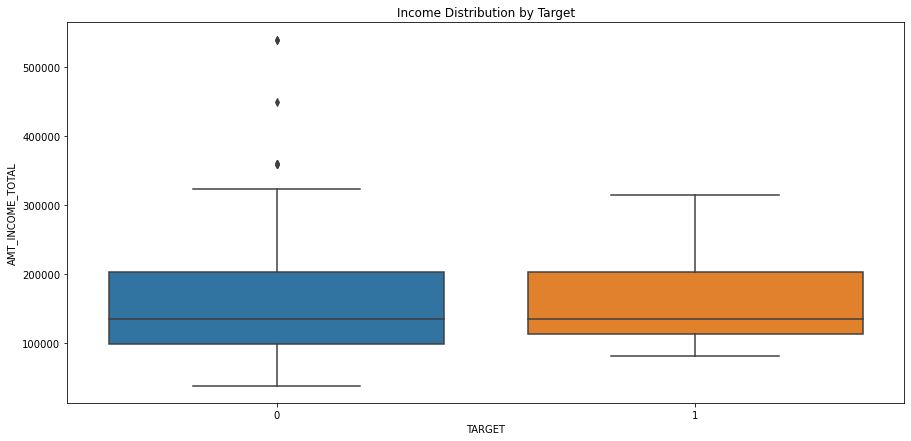

In [20]:
# Example of distribution plot for 'AMT_INCOME_TOTAL' with hue='TARGET'
plt.figure(figsize=(15, 7))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train_data1[1:100])
plt.title('Income Distribution by Target')
plt.show()

Visually comparing the income distribution between those who have repaid their loans and those who have defaulted.

For the 'TARGET = 0' group (non-defaulters), the boxplot shows that the median income is around the middle of the box, and the majority of incomes fall within the box's interquartile range (IQR).

For the 'TARGET = 1' group (defaulters), the boxplot indicates a lower median income, and there are some outliers with higher incomes.


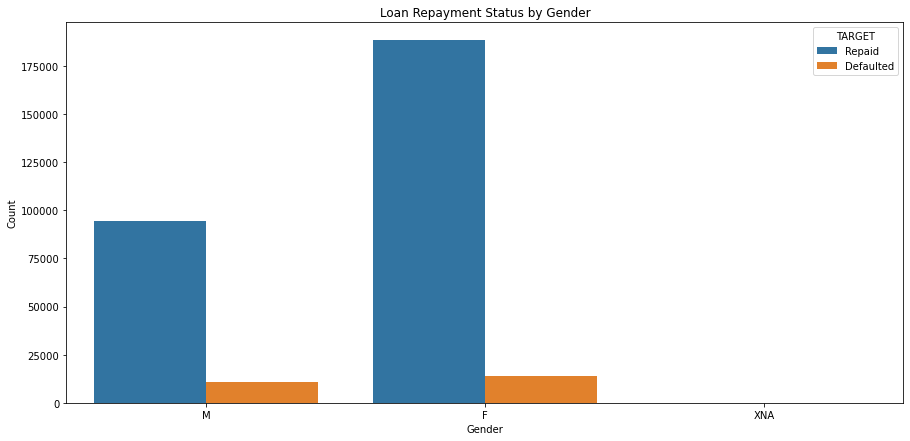

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(x='CODE_GENDER', hue='TARGET', data=train_data1)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Loan Repayment Status by Gender')
plt.legend(title='TARGET', loc='upper right', labels=['Repaid', 'Defaulted'])

# Show the plot
plt.show()

In [22]:
# Find out what is the probability that an applicant will return given that he/she is a male/Female respectively.
pd.DataFrame(train_data1.groupby(['CODE_GENDER','TARGET']).count()['SK_ID_CURR']).reset_index() 

,CODE_GENDER,TARGET,SK_ID_CURR
0,F,0,188278
1,F,1,14170
2,M,0,94404
3,M,1,10655
4,XNA,0,4


In [23]:
print("probability that an applicant will repay the given that he is a male P(R|M): 94404/(94404+10655) = 0.8985") 
print("probability that an applicant will repay the given that she is a female P(R|F): 188278/(188278+14170) = 0.9300")

probability that an applicant will repay the given that he is a male P(R|M): 94404/(94404+10655) = 0.8985
probability that an applicant will repay the given that she is a female P(R|F): 188278/(188278+14170) = 0.9300


For male applicant, there is an approximately 89.85% chance that they will repay the loan.

For female applicants, the probability of loan repayment is higher, with an approximately 93.00% chance.

The higher probability for female applicants suggests that, in the dataset, female applicants tend to have a slightly better loan repayment rate compared to male applicants.

### 7.Loading The Test Dataset

In [24]:
test_data = pd.read_csv('application_test.csv')

The pd.read_csv() function reads the data from a CSV file named 'application_test.csv' and stores it in a Pandas DataFrame called test_data. 

In [25]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


head () function displays the first few rows (by default, the first 5 rows) of the test_data DataFrame. 
It provides a quick preview of the data to understand its structure and contents.

In [26]:
test_data.shape

(48744, 121)

It retrieves and prints the shape of the test_data DataFrame, which represents the number of rows and columns in the dataset.

### 8.Data Cleaning and Preprocessing of Test Data

In [27]:
# Getting the Information About Missing Values
missing_values = test_data.isnull().sum()
test_missing_percent = (missing_values / len(test_data)) * 100
missing_info = pd.DataFrame({'Test_Missing_values': missing_values, 'Test_Missing_Values(%)': test_missing_percent})

print(missing_info.sort_values(by=['Test_Missing_Values(%)']))

                             Test_Missing_values  Test_Missing_Values(%)
SK_ID_CURR                                     0                0.000000
REG_REGION_NOT_WORK_REGION                     0                0.000000
LIVE_REGION_NOT_WORK_REGION                    0                0.000000
REG_CITY_NOT_LIVE_CITY                         0                0.000000
REG_CITY_NOT_WORK_CITY                         0                0.000000
...                                          ...                     ...
NONLIVINGAPARTMENTS_MEDI                   33347               68.412523
NONLIVINGAPARTMENTS_MODE                   33347               68.412523
COMMONAREA_MODE                            33495               68.716150
COMMONAREA_AVG                             33495               68.716150
COMMONAREA_MEDI                            33495               68.716150

[121 rows x 2 columns]


We checked for missing values in the test_data DataFrame, counting how many are missing in each column.

We calculated the percentage of missing values for each column in test_data.

Finally, we sorted the columns by their missing value percentages to identify those with the highest missing values, which helps us prioritize them for data cleaning or filling in missing data.

In [28]:


# Drop the columns from the 'test_data' DataFrame
test_data1 = test_data.drop(columns=columns_to_drop)




Then we are creating a new DataFrame called test_data1 by dropping the columns identified in the columns_to_drop Series from the original train_data DataFrame. 



In [29]:
test_data1.shape

(48744, 80)

Dropping the columns identified in the columns_to_drop Series from the original train_data DataFrame resulted in a reduction in the number of columns from 121 to 80(excluding target variable). 

In [36]:
# Filter the columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index

# Separate categorical and numeric columns
categorical_columns = test_data1.select_dtypes(include=['object']).columns
numeric_columns = test_data1.select_dtypes(include=['number']).columns

# Calculate mean values for each column with missing values (in numeric columns)
mean_values_numeric = test_data1[columns_with_missing_values & numeric_columns].mean()

# Calculate mean values for each column with missing values (in categorical columns)
mean_values_categorical = test_data1[columns_with_missing_values & categorical_columns].mode().iloc[0]

# Now, 'mean_values_numeric' contains mean values for numeric columns with missing values,
# and 'mean_values_categorical' contains mode values for categorical columns with missing values


First The data was split into categorical and numeric columns to impute missing values in the test_data1 DataFrame.

For numeric columns,we decided to use the average value (mean) as a replacement for any missing values.

For categorical columns,we choose the most frequently occurring value (mode) as a replacement for any missing values. 


In [37]:
# Fill missing values with mean for numeric columns
test_data1[numeric_columns] = test_data1[numeric_columns].fillna(test_data1[numeric_columns].mean())

# Fill missing values with mode for categorical columns
for column in categorical_columns:
    mode_value = test_data1[column].mode().iloc[0]
    test_data1[column] = test_data1[column].fillna(mode_value)

Here we are filling in missing values in both numeric and categorical columns of the test_data1 DataFrame. Numeric columns are imputed with the mean, and categorical columns are imputed with the mode. 

Imputing missing values is an essential step in data preprocessing to ensure that the dataset is ready for analysis or modeling.

In [38]:
test_data1

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000


The dataset called test_data1 has been thoroughly cleaned and transformed to a state where it's now well-prepared and suitable for both the data exploration process (EDA) and the modeling process.

### 9.Joining With Transactional Data

In [33]:
bureau_data = pd.read_csv('bureau.csv')

The pd.read_csv() function reads the data from a CSV file named 'bureau.csv' and stores it in a Pandas DataFrame called bureau_data. 

In [34]:
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


head () function displays the first few rows (by default, the first 5 rows) of the bureau_data DataFrame. 
It provides a quick preview of the data to understand its structure and contents.

In [35]:
# Performing necessary aggregations on bureau_data
# Example: Calculate the average of a numerical column 'AMT_CREDIT_SUM_DEBT' grouped by 'SK_ID_CURR'
bureau_aggregated = bureau_data.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].mean().reset_index()
bureau_aggregated

,SK_ID_CURR,AMT_CREDIT_SUM_DEBT
0,100001,85240.928571
1,100002,49156.200000
2,100003,0.000000
3,100004,0.000000
4,100005,189469.500000
...,...,...
305806,456249,16307.100000
305807,456250,744013.365000
305808,456253,448958.250000
305809,456254,0.000000


'bureau_aggregated' will contain a list of unique 'SK_ID_CURR' values along with the corresponding average 'AMT_CREDIT_SUM_DEBT' for each client in the 'bureau_data' DataFrame. This aggregated data can be used for further analysis or combined with other datasets for modeling or exploration.

In [47]:
# Merge the aggregated transactional data with the application data
train_data_with_transactions = pd.merge(train_data1, bureau_aggregated, on='SK_ID_CURR', how='left')


The merge operation, stored in the 'train_data_with_transactions' DataFrame, will contain all the columns from 'train_data1' plus the aggregated transactional data from 'bureau_aggregated' added based on matching 'SK_ID_CURR' values. This allows you to combine information from different sources into a single dataset for further analysis or modeling.

In [48]:
train_data_with_transactions.shape

(307511, 82)

It retrieves and prints the shape of the train_data_with_transactions DataFrame, which represents the number of rows and columns in the dataset.Since we have added a column to the Train dataset,number of columns increased from 81 to 82.

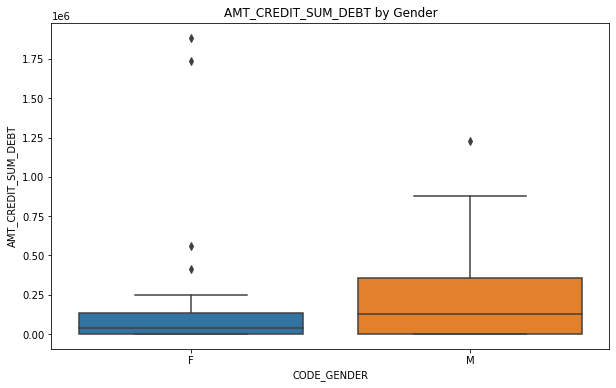

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT_SUM_DEBT', data=train_data_with_transactions[1:75])
plt.xlabel('CODE_GENDER')
plt.ylabel('AMT_CREDIT_SUM_DEBT')
plt.title('AMT_CREDIT_SUM_DEBT by Gender')
plt.show()

The boxplot reveals that males tend to have a higher distribution of credit debt ('AMT_CREDIT_SUM_DEBT') compared to females, while females generally have lower credit debt amounts. This visualization allows us to directly compare how credit debt varies between genders, making it straightforward to spot differences or patterns in the data.

### 10.Result

Age and Default: There is a positive correlation (approximately 0.0782) between the borrower's age and the likelihood of loan default. This means that younger borrowers have a slightly higher chance of defaulting on their loans.

External Credit Scores: The 'TARGET' variable has negative correlations with 'EXT_SOURCE_3' and 'EXT_SOURCE_2' (approximately -0.1574 and -0.1603, respectively). Lower external credit scores are associated with a higher likelihood of loan default.

Imbalanced Target Variable: The distribution of the 'TARGET' variable in the train_data1 DataFrame shows that most borrowers (282,686) have repaid their loans. This indicates that the dataset's target label is imbalanced, with a majority of non-defaulters.

Gender: Females are the highest borrowers, followed by males. There are only four instances of 'XNA' gender. 
Borrowers:Most clients are laborers, while IT Staff comprises the smallest group. 
Income:Managers have the highest income, while cleaning staff have the lowest. Laborers face the most difficulty in repaying loans.

Safe Borrowers: Lending to realty agents, IT staff, and HR staff appears to be the safest based on the data.

Car Ownership: The majority of applicants, both car owners and non-car owners, fall into the '0' category, indicating timely loan repayment. Non-car owners have a slightly higher proportion of non-defaulters.

Income Distribution: Comparing the income distribution between non-defaulters ('TARGET = 0') and defaulters ('TARGET = 1'), it's observed that non-defaulters have a higher median income, while defaulters have a lower median income. There are some outliers with higher incomes among defaulters.

Gender and Loan Repayment Probability: The probability of loan repayment differs by gender. For male applicants, there is an approximately 89.85% chance of loan repayment. In contrast, female applicants have a higher probability (approximately 93.00%) of repaying loans. This suggests that, in the dataset, female applicants tend to have a slightly better loan repayment rate compared to male applicants.

## Completed !